In [ ]:
import os

In [ ]:
pip install numpy

In [ ]:
!python -m pip install --upgrade pip

In [ ]:
pip install pandas

Note: you may need to restart the kernel to use updated packages.


In [3]:
import numpy as np
import matplotlib.pyplot as plt
import cv2
import plotly.graph_objects as go
import plotly.express as px

In [ ]:
pip install matplotlib

Note: you may need to restart the kernel to use updated packages.


In [ ]:
pip install opencv-python

Note: you may need to restart the kernel to use updated packages.


In [ ]:
pip install plotly 

Note: you may need to restart the kernel to use updated packages.


In [ ]:
pip install tensorflow

INFO: pip is looking at multiple versions of tensorflow-intel to determine which version is compatible with other requirements. This could take a while.
Note: you may need to restart the kernel to use updated packages.


ERROR: Could not find a version that satisfies the requirement keras<2.14,>=2.13.1 (from tensorflow-intel) (from versions: none)
ERROR: No matching distribution found for keras<2.14,>=2.13.1


In [ ]:
pip install keras

Note: you may need to restart the kernel to use updated packages.


In [ ]:
pip install keras.layer

Note: you may need to restart the kernel to use updated packages.


ERROR: Could not find a version that satisfies the requirement keras.layer (from versions: none)
ERROR: No matching distribution found for keras.layer


In [ ]:
from tensorflow import keras


In [30]:
import tensorflow as tf
from tensorflow.keras import layers
from tensorflow.keras.models import Model,Sequential
from tensorflow.keras.layers import Flatten, Activation, Dense, Dropout, Conv2D, MaxPool2D
from tensorflow.keras.callbacks import EarlyStopping


In [ ]:
'import sys; print sys.path'

'import sys; print sys.path'

LOAD DATASET

In [44]:
tf.config.list_physical_devices()

[PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU')]

In [19]:
train_dir = r"E:\Versity SANJID UD DOWLA 201-35-614\THESIS\1st dataset\archive(1)\archive (5)\Training"
test_dir = r"E:\Versity SANJID UD DOWLA 201-35-614\THESIS\1st dataset\archive(1)\archive (5)\Testing"

batch_size = 32
img_height = 224
img_width = 224

In [18]:
import os
import cv2
import numpy as np

train_dir = r"E:\Versity SANJID UD DOWLA 201-35-614\THESIS\1st dataset\archive(1)\archive (5)\Training"
test_dir = r"E:\Versity SANJID UD DOWLA 201-35-614\THESIS\1st dataset\archive(1)\archive (5)\Testing"


batch_size = 32
img_height = 224
img_width = 224


augmented_dir = "augmented_images"
os.makedirs(augmented_dir, exist_ok=True)

def augment_image(image):
   
    if np.random.rand() < 0.5:
        image = np.fliplr(image)

    # Randomly adjust brightness and contrast
    alpha = 1.0 + np.random.uniform(-0.2, 0.2)
    beta = 0.5 + np.random.uniform(-0.2, 0.2)
    image = cv2.convertScaleAbs(image, alpha=alpha, beta=beta)

    # Randomly rotate the image
    angle = np.random.uniform(-20, 20)
    rows, cols, _ = image.shape
    rotation_matrix = cv2.getRotationMatrix2D((cols / 2, rows / 2), angle, 1)
    image = cv2.warpAffine(image, rotation_matrix, (cols, rows))

    return image


for root, dirs, files in os.walk(train_dir):
    for file in files:
        if file.endswith(('.jpg', '.jpeg', '.png')):  
            img_path = os.path.join(root, file)
            image = cv2.imread(img_path)
            image = cv2.resize(image, (img_width, img_height))
            augmented_image = augment_image(image)


            augmented_path = os.path.join(augmented_dir, file)
            cv2.imwrite(augmented_path, augmented_image)

In [28]:
train_data = tf.keras.utils.image_dataset_from_directory(
    train_dir,
    validation_split=0.2,
    subset="training",
    seed=143,
    image_size=(img_height, img_width),
    batch_size=batch_size,
    label_mode= 'int'
)

Found 5712 files belonging to 4 classes.
Using 4570 files for training.


In [48]:
val_data = tf.keras.utils.image_dataset_from_directory(
    train_dir,
    validation_split=0.2,
    subset="validation",
    seed=143,
    image_size=(img_height, img_width),
    batch_size=batch_size,
    label_mode= 'int'
)

Found 5712 files belonging to 4 classes.
Using 1142 files for validation.


EDA

In [ ]:
class_names= train_data.class_names
print(class_names)

['glioma', 'meningioma', 'notumor', 'pituitary']


In [2]:
import matplotlib.pyplot as plt 

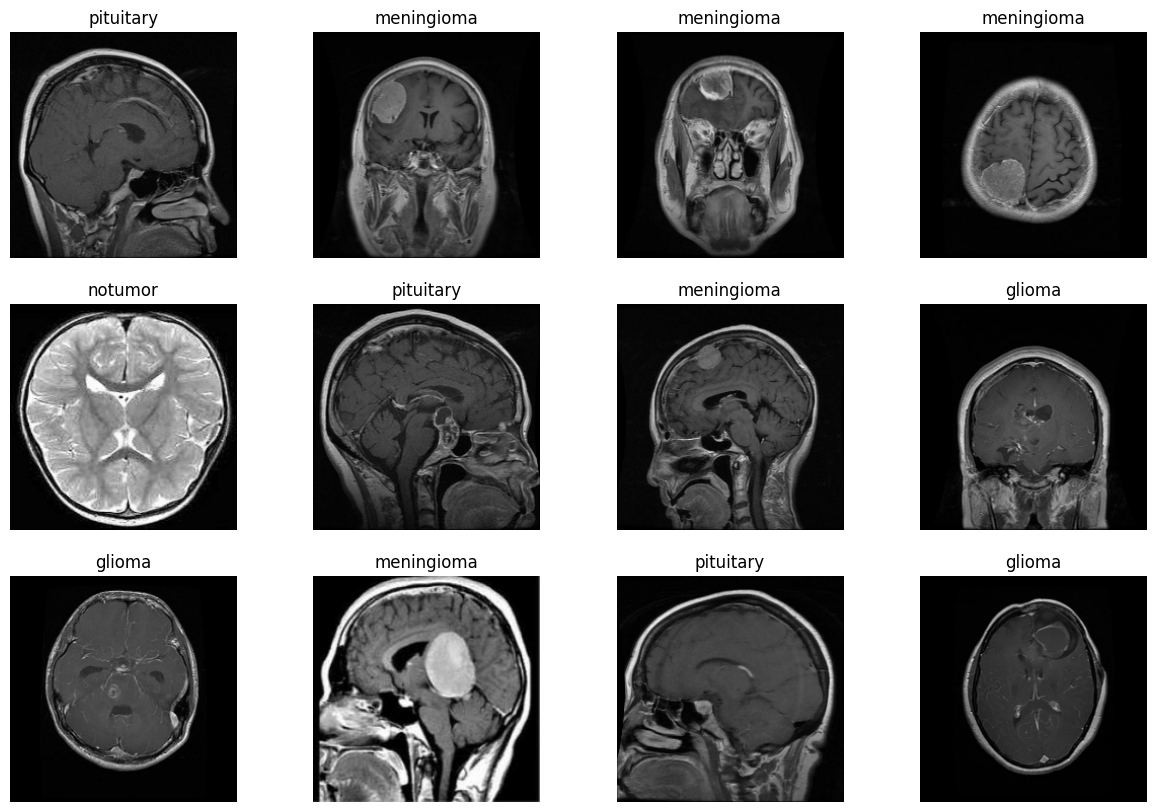

In [ ]:
plt.figure(figsize=(15, 10))
for images, labels in train_data.take(1):
    for i in range(12):
        ax = plt.subplot(3, 4, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.title(class_names[labels[i]])
        plt.axis("off")

In [ ]:
meningioma = 0
notumor = 0
glioma = 0
pituitary = 0

for images, labels in train_data:
    for i in range(len(images)):
        #print(class_names[labels[i]])
        if class_names[labels[i]] == 'meningioma':
            meningioma +=1
        elif class_names[labels[i]] == 'notumor':
            notumor +=1
        elif class_names[labels[i]] == 'glioma':
            glioma +=1
        elif class_names[labels[i]] == 'pituitary':
            pituitary +=1
            
            
print('meningioma : ', meningioma)
print('glioma : ', glioma)
print('pituitary : ', pituitary)
print('notumor : ', notumor)

meningioma :  1073
glioma :  1055
pituitary :  1157
notumor :  1285


Balanced or not

In [ ]:
pip install ipython nbformat

Note: you may need to restart the kernel to use updated packages.


In [4]:
import plotly.express as px

In [ ]:
fig = px.pie(values=[meningioma + glioma + pituitary, notumor], names=['tumor', 'notumor'], hole=0.425)
fig.update_layout(title='Brain Tumor Distribution', font_size=15, title_x=0.45, annotations=[dict(text='BrainTumor', font_size=18, showarrow=False, height=800, width=700)])
fig.update_traces(textfont_size=15, textinfo='percent')

fig.show()

In [3]:
import plotly.graph_objects as go

In [ ]:
fig = go.Figure(go.Bar(
            x= [meningioma,glioma,pituitary,notumor],
            y= ['meningioma','glioma','pituitary','notumor'],
            orientation='h'))

fig.update_layout(title='Brain Tumor Distribution',font_size=15,title_x=0.45)


fig.show()

In [ ]:
fig=px.pie(values = [meningioma,glioma,pituitary,notumor], names=['meningioma','glioma','pituitary','notumor'],hole=0.425)
fig.update_layout(title='Brain Tumor Distribution',font_size=15,title_x=0.45,annotations=[dict(text='BrainTumor',font_size=18, showarrow=False,height=800,width=700)])
fig.update_traces(textfont_size=15,textinfo='percent')
fig.show()


Model

In [ ]:
pip install --upgrade keras

Note: you may need to restart the kernel to use updated packages.


In [29]:
from keras.preprocessing.image import ImageDataGenerator

trainDataGenerator = ImageDataGenerator(rescale=1./255, validation_split=0.2)
testDataGenerator = ImageDataGenerator(rescale=1./255)


In [30]:
train_d = trainDataGenerator.flow_from_directory(
     r"E:\Versity SANJID UD DOWLA 201-35-614\THESIS\1st dataset\archive(1)\archive (5)\Training",
      classes=['glioma','meningioma','notumor','pituitary'],
      color_mode="rgb",
      batch_size=16,
      target_size=(64,64),
      class_mode="categorical",
      subset="training")

valid_d = trainDataGenerator.flow_from_directory(
    r"E:\Versity SANJID UD DOWLA 201-35-614\THESIS\1st dataset\archive(1)\archive (5)\Training",
    classes=['glioma','meningioma','notumor','pituitary'],
    color_mode="rgb",
    batch_size=16,
    target_size=(64,64),
    class_mode="categorical",
    subset="validation"
)

test_d = testDataGenerator.flow_from_directory(
    r"E:\Versity SANJID UD DOWLA 201-35-614\THESIS\1st dataset\archive(1)\archive (5)\Testing",
    classes = ['glioma','meningioma','notumor','pituitary'],
    color_mode="rgb",
    target_size=(64,64))

Found 4571 images belonging to 4 classes.
Found 1141 images belonging to 4 classes.
Found 1311 images belonging to 4 classes.


In [15]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D
from tensorflow.keras import callbacks

import matplotlib.pyplot as plt


OLD CUSTOM MODEL

In [16]:
model = Sequential()
model.add(Conv2D(64*64,(3,3), input_shape=(64,64,3), padding="same", activation="relu"))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(64,(3,3), padding="same", activation="relu"))
model.add(Dropout(rate=0.4))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(32,(3,3), padding="same", activation="relu"))
model.add(Dropout(rate=0.2))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Flatten())

model.add(Dense(16, activation="relu"))
model.add(Dropout(rate=0.2))

model.add(Dense(4, activation="softmax"))

model.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['accuracy']
)
callback_list=[
    callbacks.EarlyStopping(monitor="val_accuracy",patience=10,restore_best_weights=True),
    callbacks.ReduceLROnPlateau(factor=0.8,monitor="val_accuracy",patience=3)
]

New Custom Model

In [11]:
from tensorflow.keras.layers import (
    Conv2D,
    MaxPooling2D,
    Dropout,
    Flatten,
    Dense,
    BatchNormalization,
)
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau

In [ ]:
model = Sequential()
model.add(Conv2D(64, (3, 3), input_shape=(64, 64, 3), padding="same", activation="relu"))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(128, (3, 3), padding="same", activation="relu"))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(256, (3, 3), padding="same", activation="relu"))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))


model.add(Flatten())


model.add(Dense(128, activation="relu"))
model.add(Dropout(rate=0.4))

model.add(Dense(64, activation="relu"))
model.add(Dropout(rate=0.2))


model.add(Dense(4, activation="softmax"))


model.compile(
    optimizer=Adam(learning_rate=0.001),
    loss='categorical_crossentropy', 
    metrics=['accuracy']
)


datagen = ImageDataGenerator(
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    horizontal_flip=True,
)


callback_list = [
    EarlyStopping(monitor="val_accuracy", patience=10, restore_best_weights=True),
    ReduceLROnPlateau(factor=0.8, monitor="val_accuracy", patience=3),
]
model.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_18 (Conv2D)          (None, 64, 64, 64)        1792      
                                                                 
 batch_normalization_3 (Bat  (None, 64, 64, 64)        256       
 chNormalization)                                                
                                                                 
 max_pooling2d_18 (MaxPooli  (None, 32, 32, 64)        0         
 ng2D)                                                           
                                                                 
 conv2d_19 (Conv2D)          (None, 32, 32, 128)       73856     
                                                                 
 batch_normalization_4 (Bat  (None, 32, 32, 128)       512       
 chNormalization)                                                
                                                      

In [ ]:
@tf.autograph.experimental.do_not_convert
def custom_fit():history = model.fit(train_d, validation_data=valid_d, epochs=50, verbose=1, callbacks=callback_list, batch_size=32)

In [ ]:
history = model.fit(train_d, validation_data=valid_d, epochs=50, verbose=1, callbacks=callback_list, batch_size=32)

Epoch 1/50
286/286 [==============================] - 91s 305ms/step - loss: 1.3822 - accuracy: 0.5743 - val_loss: 6.2286 - val_accuracy: 0.2787 - lr: 0.0010
Epoch 2/50
286/286 [==============================] - 76s 266ms/step - loss: 0.8784 - accuracy: 0.6425 - val_loss: 1.1159 - val_accuracy: 0.5793 - lr: 0.0010
Epoch 3/50
286/286 [==============================] - 73s 255ms/step - loss: 0.7626 - accuracy: 0.6939 - val_loss: 1.2097 - val_accuracy: 0.5644 - lr: 0.0010
Epoch 4/50
286/286 [==============================] - 75s 261ms/step - loss: 0.6987 - accuracy: 0.7307 - val_loss: 0.7797 - val_accuracy: 0.6889 - lr: 0.0010
Epoch 5/50
286/286 [==============================] - 77s 270ms/step - loss: 0.6721 - accuracy: 0.7268 - val_loss: 0.8592 - val_accuracy: 0.7187 - lr: 0.0010
Epoch 6/50
286/286 [==============================] - 78s 272ms/step - loss: 0.5730 - accuracy: 0.7808 - val_loss: 0.7458 - val_accuracy: 0.7537 - lr: 0.0010
Epoch 7/50
286/286 [==============================] 

accuracy 1st=0.7604
accuracy 2nd=0.7856
accuracy 3rd=0.8024
accuracy 4th=0.8484 

In [ ]:
def plotRes(history): 
    plt.figure(1, figsize = (15,8)) 
    
    plt.subplot(221)  
    plt.plot(history.history['accuracy'])  
    plt.plot(history.history['val_accuracy'])  
    plt.title('model accuracy')  
    plt.ylabel('accuracy')  
    plt.xlabel('epoch')  
    plt.legend(['train', 'valid']) 
    
    plt.subplot(222)  
    plt.plot(history.history['loss'])  
    plt.plot(history.history['val_loss'])  
    plt.title('model loss')  
    plt.ylabel('loss')  
    plt.xlabel('epoch')  
    plt.legend(['train', 'valid']) 

In [ ]:
plt.show()

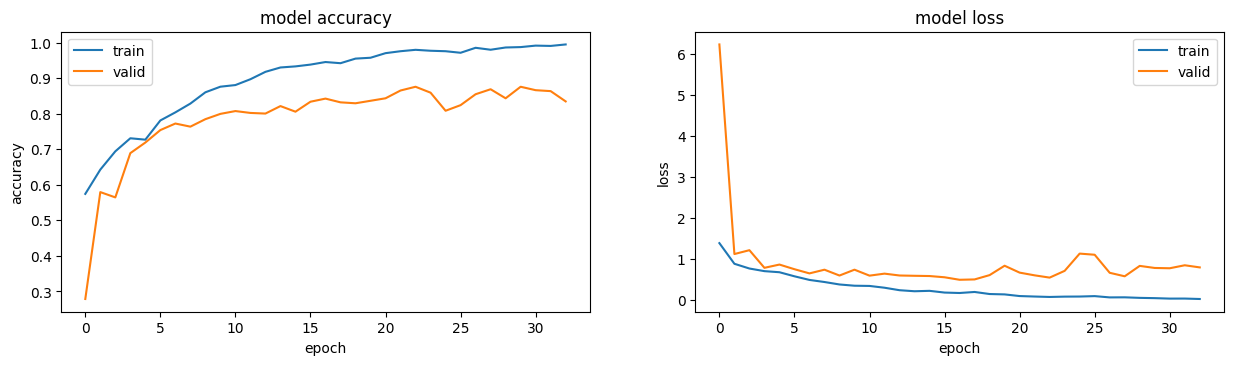

In [ ]:
plotRes(history)

Again OLD Custom Model

In [24]:
model = Sequential()
model.add(Conv2D(64*64,(3,3), input_shape=(64,64,3), padding="same", activation="relu"))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(64,(3,3), padding="same", activation="relu"))
model.add(Dropout(rate=0.4))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(32,(3,3), padding="same", activation="relu"))
model.add(Dropout(rate=0.2))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Flatten())

model.add(Dense(16, activation="relu"))
model.add(Dropout(rate=0.2))

model.add(Dense(4, activation="softmax"))

model.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['accuracy']
)
callback_list=[
    callbacks.EarlyStopping(monitor="val_accuracy",patience=10,restore_best_weights=True),
    callbacks.ReduceLROnPlateau(factor=0.8,monitor="val_accuracy",patience=3)
]

In [25]:
history = model.fit(train_d, validation_data=valid_d, epochs=50, verbose=1, callbacks=callback_list, batch_size=32)

Epoch 1/50
286/286 [==============================] - 2030s 7s/step - loss: 0.4230 - accuracy: 0.5561 - val_loss: 0.4024 - val_accuracy: 0.6687 - lr: 0.0010
Epoch 2/50
286/286 [==============================] - 1393s 5s/step - loss: 0.3120 - accuracy: 0.6861 - val_loss: 0.3943 - val_accuracy: 0.6705 - lr: 0.0010
Epoch 3/50
286/286 [==============================] - 1346s 5s/step - loss: 0.2704 - accuracy: 0.7635 - val_loss: 0.3853 - val_accuracy: 0.6512 - lr: 0.0010
Epoch 4/50
286/286 [==============================] - 1306s 5s/step - loss: 0.2341 - accuracy: 0.8090 - val_loss: 0.3316 - val_accuracy: 0.7064 - lr: 0.0010
Epoch 5/50
286/286 [==============================] - 1318s 5s/step - loss: 0.1922 - accuracy: 0.8333 - val_loss: 0.3111 - val_accuracy: 0.7572 - lr: 0.0010
Epoch 6/50
286/286 [==============================] - 1314s 5s/step - loss: 0.1730 - accuracy: 0.8504 - val_loss: 0.2849 - val_accuracy: 0.7765 - lr: 0.0010
Epoch 7/50
286/286 [==============================] - 1272

In [ ]:
def plotRes(history): 
    plt.figure(1, figsize = (15,8)) 
    
    plt.subplot(221)  
    plt.plot(history.history['accuracy'])  
    plt.plot(history.history['val_accuracy'])  
    plt.title('model accuracy')  
    plt.ylabel('accuracy')  
    plt.xlabel('epoch')  
    plt.legend(['train', 'valid']) 
    
    plt.subplot(222)  
    plt.plot(history.history['loss'])  
    plt.plot(history.history['val_loss'])  
    plt.title('model loss')  
    plt.ylabel('loss')  
    plt.xlabel('epoch')  
    plt.legend(['train', 'valid']) 

In [ ]:
plt.show()

In [ ]:
plotRes(history)

NameError: name 'history' is not defined

Using VGG16

In [12]:
from keras.applications import VGG16
from keras.models import Model
from keras.layers import Flatten, Dense, Dropout
from keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
 
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(64, 64, 3))

x = base_model.output
x = Flatten()(x)
x = Dense(128, activation='relu')(x)
x = Dropout(0.4)(x)
x = Dense(64, activation='relu')(x)
x = Dropout(0.2)(x)
predictions = Dense(4, activation='softmax')(x)


model = Model(inputs=base_model.input, outputs=predictions)

model.compile(
    optimizer=Adam(learning_rate=0.001),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)
callback_list = [
    EarlyStopping(monitor="val_accuracy", patience=10, restore_best_weights=True),
    ReduceLROnPlateau(factor=0.8, monitor="val_accuracy", patience=3),
]
model.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 64, 64, 3)]       0         
                                                                 
 block1_conv1 (Conv2D)       (None, 64, 64, 64)        1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 64, 64, 64)        36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 32, 32, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 32, 32, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 32, 32, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 16, 16, 128)       0   

In [50]:
history = model.fit(train_d, validation_data=valid_d, epochs=50, verbose=1, callbacks=callback_list, batch_size=32)

Epoch 1/50
286/286 [==============================] - 994s 3s/step - loss: 1.4155 - accuracy: 0.2704 - val_loss: 1.3841 - val_accuracy: 0.2796 - lr: 0.0010
Epoch 2/50
286/286 [==============================] - 746s 3s/step - loss: 1.3853 - accuracy: 0.2737 - val_loss: 1.3836 - val_accuracy: 0.2796 - lr: 0.0010
Epoch 3/50
286/286 [==============================] - 757s 3s/step - loss: 1.3838 - accuracy: 0.2792 - val_loss: 1.3834 - val_accuracy: 0.2796 - lr: 0.0010
Epoch 4/50
286/286 [==============================] - 762s 3s/step - loss: 1.3837 - accuracy: 0.2792 - val_loss: 1.3833 - val_accuracy: 0.2796 - lr: 0.0010
Epoch 5/50
286/286 [==============================] - 601s 2s/step - loss: 1.3835 - accuracy: 0.2792 - val_loss: 1.3833 - val_accuracy: 0.2796 - lr: 8.0000e-04
Epoch 6/50
286/286 [==============================] - 485s 2s/step - loss: 1.3836 - accuracy: 0.2792 - val_loss: 1.3833 - val_accuracy: 0.2796 - lr: 8.0000e-04
Epoch 7/50
286/286 [==============================] - 43

In [51]:
def plotRes(history): 
    plt.figure(1, figsize = (15,8)) 
    
    plt.subplot(221)  
    plt.plot(history.history['accuracy'])  
    plt.plot(history.history['val_accuracy'])  
    plt.title('model accuracy')  
    plt.ylabel('accuracy')  
    plt.xlabel('epoch')  
    plt.legend(['train', 'valid']) 
    
    plt.subplot(222)  
    plt.plot(history.history['loss'])  
    plt.plot(history.history['val_loss'])  
    plt.title('model loss')  
    plt.ylabel('loss')  
    plt.xlabel('epoch')  
    plt.legend(['train', 'valid']) 

In [52]:
plt.show()

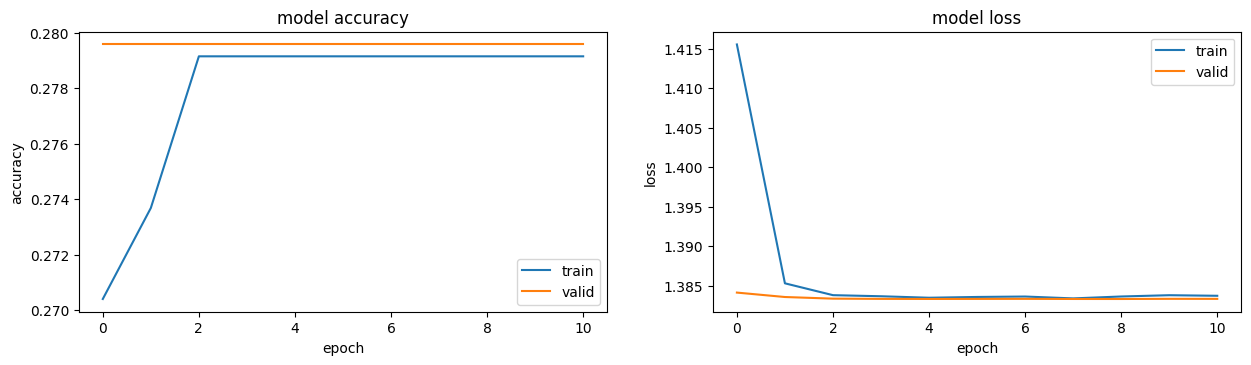

In [53]:
plotRes(history)

Using ResNet50:

In [12]:
from keras.applications import ResNet50
from keras.models import Model
from keras.layers import Flatten, Dense, Dropout
from keras.optimizers import Adam

base_model = ResNet50(weights='imagenet', include_top=False, input_shape=(64, 64, 3))


x = base_model.output
x = Flatten()(x)
x = Dense(128, activation='relu')(x)
x = Dropout(0.4)(x)
x = Dense(64, activation='relu')(x)
x = Dropout(0.2)(x)
predictions = Dense(4, activation='softmax')(x)


model = Model(inputs=base_model.input, outputs=predictions)


model.compile(
    optimizer=Adam(learning_rate=0.001),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)
callback_list = [
    EarlyStopping(monitor="val_accuracy", patience=10, restore_best_weights=True),
    ReduceLROnPlateau(factor=0.8, monitor="val_accuracy", patience=3),
]

# Summary of the model
model.summary()


Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_2 (InputLayer)        [(None, 64, 64, 3)]          0         []                            
                                                                                                  
 conv1_pad (ZeroPadding2D)   (None, 70, 70, 3)            0         ['input_2[0][0]']             
                                                                                                  
 conv1_conv (Conv2D)         (None, 32, 32, 64)           9472      ['conv1_pad[0][0]']           
                                                                                                  
 conv1_bn (BatchNormalizati  (None, 32, 32, 64)           256       ['conv1_conv[0][0]']          
 on)                                                                                        

In [17]:
history = model.fit(train_d, validation_data=valid_d, epochs=50, verbose=1, callbacks=callback_list, batch_size=32)

Epoch 1/50
286/286 [==============================] - 443s 1s/step - loss: 1.1788 - accuracy: 0.6624 - val_loss: 46.1240 - val_accuracy: 0.2796 - lr: 0.0010
Epoch 2/50
286/286 [==============================] - 406s 1s/step - loss: 0.7594 - accuracy: 0.7578 - val_loss: 2.2732 - val_accuracy: 0.2349 - lr: 0.0010
Epoch 3/50
286/286 [==============================] - 423s 1s/step - loss: 0.5609 - accuracy: 0.8313 - val_loss: 3.5801 - val_accuracy: 0.2936 - lr: 0.0010
Epoch 4/50
286/286 [==============================] - 435s 2s/step - loss: 0.4505 - accuracy: 0.8703 - val_loss: 0.8447 - val_accuracy: 0.7283 - lr: 0.0010
Epoch 5/50
286/286 [==============================] - 892s 3s/step - loss: 0.3874 - accuracy: 0.8862 - val_loss: 1.0456 - val_accuracy: 0.6573 - lr: 0.0010
Epoch 6/50
286/286 [==============================] - 352s 1s/step - loss: 0.4451 - accuracy: 0.8595 - val_loss: 1.1156 - val_accuracy: 0.5679 - lr: 0.0010
Epoch 7/50
286/286 [==============================] - 354s 1s/s

In [18]:
def plotRes(history): 
    plt.figure(1, figsize = (15,8)) 
    
    plt.subplot(221)  
    plt.plot(history.history['accuracy'])  
    plt.plot(history.history['val_accuracy'])  
    plt.title('model accuracy')  
    plt.ylabel('accuracy')  
    plt.xlabel('epoch')  
    plt.legend(['train', 'valid']) 
    
    plt.subplot(222)  
    plt.plot(history.history['loss'])  
    plt.plot(history.history['val_loss'])  
    plt.title('model loss')  
    plt.ylabel('loss')  
    plt.xlabel('epoch')  
    plt.legend(['train', 'valid']) 

In [19]:
plt.show()

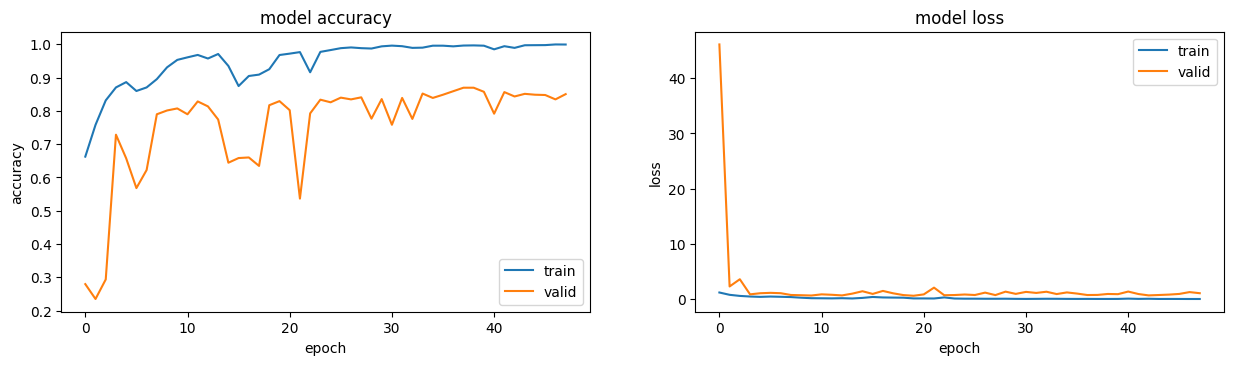

In [20]:
plotRes(history)

Using InceptionV3:

In [34]:
from keras.applications import InceptionV3
from keras.models import Model
from keras.layers import Flatten, Dense, Dropout
from keras.optimizers import Adam

# Load the pre-trained InceptionV3 model without the top (fully connected) layers
base_model = InceptionV3(weights='imagenet', include_top=False, input_shape=(75, 75, 3))

# Add custom top layers for your specific task
x = base_model.output
x = Flatten()(x)
x = Dense(128, activation='relu')(x)
x = Dropout(0.4)(x)
x = Dense(64, activation='relu')(x)
x = Dropout(0.2)(x)
predictions = Dense(4, activation='softmax')(x)

# Create a new model by combining the InceptionV3 base model with the custom top layers
model = Model(inputs=base_model.input, outputs=predictions)

# Compile the model
model.compile(
    optimizer=Adam(learning_rate=0.001),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)
callback_list = [
    EarlyStopping(monitor="val_accuracy", patience=10, restore_best_weights=True),
    ReduceLROnPlateau(factor=0.8, monitor="val_accuracy", patience=3),
]
model.summary()

Model: "model_10"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_11 (InputLayer)       [(None, 75, 75, 3)]          0         []                            
                                                                                                  
 conv2d_567 (Conv2D)         (None, 37, 37, 32)           864       ['input_11[0][0]']            
                                                                                                  
 batch_normalization_567 (B  (None, 37, 37, 32)           96        ['conv2d_567[0][0]']          
 atchNormalization)                                                                               
                                                                                                  
 activation_564 (Activation  (None, 37, 37, 32)           0         ['batch_normalization_5

In [36]:
from keras.applications import InceptionV3
from keras.models import Model
from keras.layers import Flatten, Dense, Dropout, BatchNormalization, MaxPooling2D
from keras.optimizers import Adam
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import EarlyStopping, ReduceLROnPlateau

# Load the pre-trained InceptionV3 model
base_model = InceptionV3(weights='imagenet', include_top=False, input_shape=(75, 75, 3))

# Create a new model by combining the InceptionV3 base model with your custom top layers
x = base_model.output
x = MaxPooling2D(pool_size=(2, 2))(x)
x = Flatten()(x)
x = Dense(128, activation='relu')(x)
x = BatchNormalization()(x)
x = Dropout(0.4)(x)
x = Dense(64, activation='relu')(x)
x = BatchNormalization()(x)
x = Dropout(0.2)(x)
predictions = Dense(4, activation='softmax')(x)

model = Model(inputs=base_model.input, outputs=predictions)

# Compile the model
model.compile(
    optimizer=Adam(learning_rate=0.001),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

# Data augmentation
datagen = ImageDataGenerator(
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    horizontal_flip=True,
)

# Callbacks
callback_list = [
    EarlyStopping(monitor="val_accuracy", patience=10, restore_best_weights=True),
    ReduceLROnPlateau(factor=0.8, monitor="val_accuracy", patience=3),
]

model.summary()


ValueError: Exception encountered when calling layer "max_pooling2d_35" (type MaxPooling2D).

Negative dimension size caused by subtracting 2 from 1 for '{{node max_pooling2d_35/MaxPool}} = MaxPool[T=DT_FLOAT, data_format="NHWC", explicit_paddings=[], ksize=[1, 2, 2, 1], padding="VALID", strides=[1, 2, 2, 1]](Placeholder)' with input shapes: [?,1,1,2048].

Call arguments received by layer "max_pooling2d_35" (type MaxPooling2D):
  • inputs=tf.Tensor(shape=(None, 1, 1, 2048), dtype=float32)

In [35]:
history = model.fit(train_d, validation_data=valid_d, epochs=50, verbose=1, callbacks=callback_list, batch_size=32)

Epoch 1/50


InvalidArgumentError: Graph execution error:

Detected at node 'model_10/dense_33/Relu' defined at (most recent call last):
    File "<frozen runpy>", line 198, in _run_module_as_main
    File "<frozen runpy>", line 88, in _run_code
    File "C:\Users\sanjid\AppData\Roaming\Python\Python311\site-packages\ipykernel_launcher.py", line 17, in <module>
      app.launch_new_instance()
    File "C:\Users\sanjid\AppData\Roaming\Python\Python311\site-packages\traitlets\config\application.py", line 1043, in launch_instance
      app.start()
    File "C:\Users\sanjid\AppData\Roaming\Python\Python311\site-packages\ipykernel\kernelapp.py", line 736, in start
      self.io_loop.start()
    File "C:\Users\sanjid\AppData\Roaming\Python\Python311\site-packages\tornado\platform\asyncio.py", line 195, in start
      self.asyncio_loop.run_forever()
    File "c:\Users\sanjid\AppData\Local\Programs\Python\Python311\Lib\asyncio\base_events.py", line 607, in run_forever
      self._run_once()
    File "c:\Users\sanjid\AppData\Local\Programs\Python\Python311\Lib\asyncio\base_events.py", line 1922, in _run_once
      handle._run()
    File "c:\Users\sanjid\AppData\Local\Programs\Python\Python311\Lib\asyncio\events.py", line 80, in _run
      self._context.run(self._callback, *self._args)
    File "C:\Users\sanjid\AppData\Roaming\Python\Python311\site-packages\ipykernel\kernelbase.py", line 516, in dispatch_queue
      await self.process_one()
    File "C:\Users\sanjid\AppData\Roaming\Python\Python311\site-packages\ipykernel\kernelbase.py", line 505, in process_one
      await dispatch(*args)
    File "C:\Users\sanjid\AppData\Roaming\Python\Python311\site-packages\ipykernel\kernelbase.py", line 412, in dispatch_shell
      await result
    File "C:\Users\sanjid\AppData\Roaming\Python\Python311\site-packages\ipykernel\kernelbase.py", line 740, in execute_request
      reply_content = await reply_content
    File "C:\Users\sanjid\AppData\Roaming\Python\Python311\site-packages\ipykernel\ipkernel.py", line 422, in do_execute
      res = shell.run_cell(
    File "C:\Users\sanjid\AppData\Roaming\Python\Python311\site-packages\ipykernel\zmqshell.py", line 546, in run_cell
      return super().run_cell(*args, **kwargs)
    File "C:\Users\sanjid\AppData\Roaming\Python\Python311\site-packages\IPython\core\interactiveshell.py", line 3009, in run_cell
      result = self._run_cell(
    File "C:\Users\sanjid\AppData\Roaming\Python\Python311\site-packages\IPython\core\interactiveshell.py", line 3064, in _run_cell
      result = runner(coro)
    File "C:\Users\sanjid\AppData\Roaming\Python\Python311\site-packages\IPython\core\async_helpers.py", line 129, in _pseudo_sync_runner
      coro.send(None)
    File "C:\Users\sanjid\AppData\Roaming\Python\Python311\site-packages\IPython\core\interactiveshell.py", line 3269, in run_cell_async
      has_raised = await self.run_ast_nodes(code_ast.body, cell_name,
    File "C:\Users\sanjid\AppData\Roaming\Python\Python311\site-packages\IPython\core\interactiveshell.py", line 3448, in run_ast_nodes
      if await self.run_code(code, result, async_=asy):
    File "C:\Users\sanjid\AppData\Roaming\Python\Python311\site-packages\IPython\core\interactiveshell.py", line 3508, in run_code
      exec(code_obj, self.user_global_ns, self.user_ns)
    File "C:\Users\sanjid\AppData\Local\Temp\ipykernel_11020\1854311167.py", line 1, in <module>
      history = model.fit(train_d, validation_data=valid_d, epochs=50, verbose=1, callbacks=callback_list, batch_size=32)
    File "c:\Users\sanjid\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\utils\traceback_utils.py", line 65, in error_handler
      return fn(*args, **kwargs)
    File "c:\Users\sanjid\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\engine\training.py", line 1783, in fit
      tmp_logs = self.train_function(iterator)
    File "c:\Users\sanjid\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\engine\training.py", line 1377, in train_function
      return step_function(self, iterator)
    File "c:\Users\sanjid\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\engine\training.py", line 1360, in step_function
      outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "c:\Users\sanjid\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\engine\training.py", line 1349, in run_step
      outputs = model.train_step(data)
    File "c:\Users\sanjid\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\engine\training.py", line 1126, in train_step
      y_pred = self(x, training=True)
    File "c:\Users\sanjid\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\utils\traceback_utils.py", line 65, in error_handler
      return fn(*args, **kwargs)
    File "c:\Users\sanjid\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\engine\training.py", line 589, in __call__
      return super().__call__(*args, **kwargs)
    File "c:\Users\sanjid\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\utils\traceback_utils.py", line 65, in error_handler
      return fn(*args, **kwargs)
    File "c:\Users\sanjid\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\engine\base_layer.py", line 1149, in __call__
      outputs = call_fn(inputs, *args, **kwargs)
    File "c:\Users\sanjid\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\utils\traceback_utils.py", line 96, in error_handler
      return fn(*args, **kwargs)
    File "c:\Users\sanjid\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\engine\functional.py", line 515, in call
      return self._run_internal_graph(inputs, training=training, mask=mask)
    File "c:\Users\sanjid\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\engine\functional.py", line 672, in _run_internal_graph
      outputs = node.layer(*args, **kwargs)
    File "c:\Users\sanjid\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\utils\traceback_utils.py", line 65, in error_handler
      return fn(*args, **kwargs)
    File "c:\Users\sanjid\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\engine\base_layer.py", line 1149, in __call__
      outputs = call_fn(inputs, *args, **kwargs)
    File "c:\Users\sanjid\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\utils\traceback_utils.py", line 96, in error_handler
      return fn(*args, **kwargs)
    File "c:\Users\sanjid\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\core\dense.py", line 255, in call
      outputs = self.activation(outputs)
    File "c:\Users\sanjid\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\activations.py", line 306, in relu
      return backend.relu(
    File "c:\Users\sanjid\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\backend.py", line 5397, in relu
      x = tf.nn.relu(x)
Node: 'model_10/dense_33/Relu'
Matrix size-incompatible: In[0]: [16,0], In[1]: [2048,128]
	 [[{{node model_10/dense_33/Relu}}]] [Op:__inference_train_function_272442]

In [ ]:
def plotRes(history): 
    plt.figure(1, figsize = (15,8)) 
    
    plt.subplot(221)  
    plt.plot(history.history['accuracy'])  
    plt.plot(history.history['val_accuracy'])  
    plt.title('model accuracy')  
    plt.ylabel('accuracy')  
    plt.xlabel('epoch')  
    plt.legend(['train', 'valid']) 
    
    plt.subplot(222)  
    plt.plot(history.history['loss'])  
    plt.plot(history.history['val_loss'])  
    plt.title('model loss')  
    plt.ylabel('loss')  
    plt.xlabel('epoch')  
    plt.legend(['train', 'valid']) 

In [ ]:
plt.show()

In [ ]:
plotRes(history)

In [21]:
from keras.applications import VGG16, ResNet50, InceptionV3
from keras.models import Sequential, Model
from keras.layers import Conv2D, MaxPooling2D, BatchNormalization, Flatten, Dense, Dropout, Input
from keras.optimizers import Adam

# Define custom model
custom_model = Sequential()
custom_model.add(Conv2D(64, (3, 3), input_shape=(64, 64, 3), padding="same", activation="relu"))
custom_model.add(BatchNormalization())
custom_model.add(MaxPooling2D(pool_size=(2, 2)))
custom_model.add(Conv2D(128, (3, 3), padding="same", activation="relu"))
custom_model.add(BatchNormalization())
custom_model.add(MaxPooling2D(pool_size=(2, 2)))
custom_model.add(Conv2D(256, (3, 3), padding="same", activation="relu"))
custom_model.add(BatchNormalization())
custom_model.add(MaxPooling2D(pool_size=(2, 2)))
custom_model.add(Flatten())
custom_model.add(Dense(128, activation="relu"))
custom_model.add(Dropout(rate=0.4))
custom_model.add(Dense(64, activation="relu"))
custom_model.add(Dropout(rate=0.2))
custom_model.add(Dense(4, activation="softmax"))
custom_model.compile(
    optimizer=Adam(learning_rate=0.001),
    loss='categorical_crossentropy', 
    metrics=['accuracy']
)

# Define VGG16
vgg_model = VGG16(weights='imagenet', include_top=False, input_shape=(64, 64, 3))
x = Flatten()(vgg_model.output)
x = Dense(128, activation='relu')(x)
x = Dropout(0.4)(x)
x = Dense(64, activation='relu')(x)
x = Dropout(0.2)(x)
vgg_predictions = Dense(4, activation='softmax')(x)
vgg_model = Model(inputs=vgg_model.input, outputs=vgg_predictions)

# Define ResNet50
resnet_model = ResNet50(weights='imagenet', include_top=False, input_shape=(64, 64, 3))
x = Flatten()(resnet_model.output)
x = Dense(128, activation='relu')(x)
x = Dropout(0.4)(x)
x = Dense(64, activation='relu')(x)
x = Dropout(0.2)(x)
resnet_predictions = Dense(4, activation='softmax')(x)
resnet_model = Model(inputs=resnet_model.input, outputs=resnet_predictions)

# Define InceptionV3
inception_model = InceptionV3(weights='imagenet', include_top=False, input_shape=(75, 75, 3))
x = Flatten()(inception_model.output)
x = Dense(128, activation='relu')(x)
x = Dropout(0.4)(x)
x = Dense(64, activation='relu')(x)
x = Dropout(0.2)(x)
inception_predictions = Dense(4, activation='softmax')(x)
inception_model = Model(inputs=inception_model.input, outputs=inception_predictions)

# Show summaries of all models
print("Custom Model Summary:")
custom_model.summary()

print("\nVGG16 Model Summary:")
vgg_model.summary()

print("\nResNet50 Model Summary:")
resnet_model.summary()

print("\nInceptionV3 Model Summary:")
inception_model.summary()


Custom Model Summary:
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 64, 64, 64)        1792      
                                                                 
 batch_normalization (Batch  (None, 64, 64, 64)        256       
 Normalization)                                                  
                                                                 
 max_pooling2d (MaxPooling2  (None, 32, 32, 64)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 32, 32, 128)       73856     
                                                                 
 batch_normalization_1 (Bat  (None, 32, 32, 128)       512       
 chNormalization)                                                
                                  